<a href="https://colab.research.google.com/github/danishmustafa86/AI-AGENT/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Python (3.7 or higher) and the required libraries:

In [1]:
!pip install tensorflow numpy matplotlib


Start by importing the necessary libraries:

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

 Load and Preprocess the Dataset
We’ll use the CIFAR-10 dataset, which contains 60,000 color images in 10 classes (e.g., airplanes, cars, birds, etc.). Each image is 32x32 pixels.

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoding (optional)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Build the CNN Model
A CNN typically consists of:

Convolutional Layers: Extract features from images.

Pooling Layers: Reduce spatial dimensions.

Fully Connected Layers: Classify the extracted features.

Here’s how to build a simple CNN:

In [4]:
# Define the CNN model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output for dense layers
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Compile the Model
Before training, you need to compile the model by specifying:

Optimizer: Adam (a popular choice).

Loss Function: Categorical Crossentropy (for multi-class classification).

Metrics: Accuracy (to evaluate performance).

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the Model
Train the model using the training data. We’ll use a batch size of 64 and train for 10 epochs.

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3009 - loss: 1.8850 - val_accuracy: 0.4980 - val_loss: 1.3974
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5079 - loss: 1.3496 - val_accuracy: 0.5410 - val_loss: 1.3126
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5806 - loss: 1.1811 - val_accuracy: 0.5996 - val_loss: 1.1234
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6213 - loss: 1.0689 - val_accuracy: 0.6079 - val_loss: 1.1182
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6578 - loss: 0.9811 - val_accuracy: 0.6528 - val_loss: 0.9952
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6747 - loss: 0.9269 - val_accuracy: 0.6642 - val_loss: 0.9717
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6958 - loss: 0.8693 - val_accuracy: 0.6781 - val_loss: 0.9410
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7107 - loss: 0.8218 - val_accuracy: 0

 Evaluate the Model
After training, evaluate the model on the test data to check its performance.

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6879 - loss: 0.9094
Test accuracy: 0.6841999888420105


Visualize Training Results
Plot the training and validation accuracy/loss to understand how the model performed.

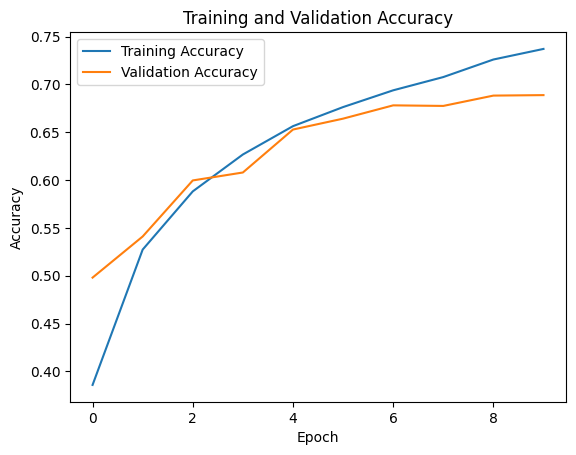

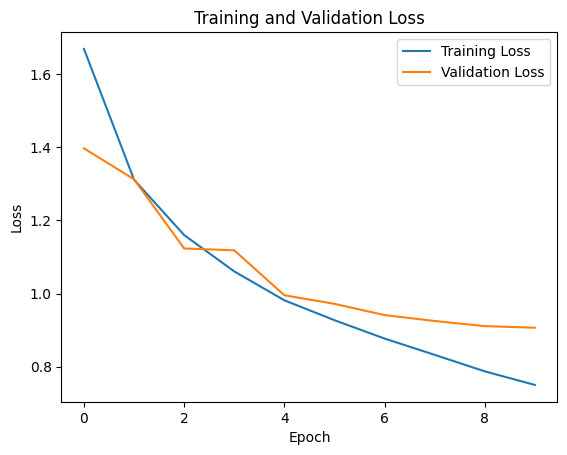

In [8]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Make Predictions
Use the trained model to make predictions on new images.

python


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


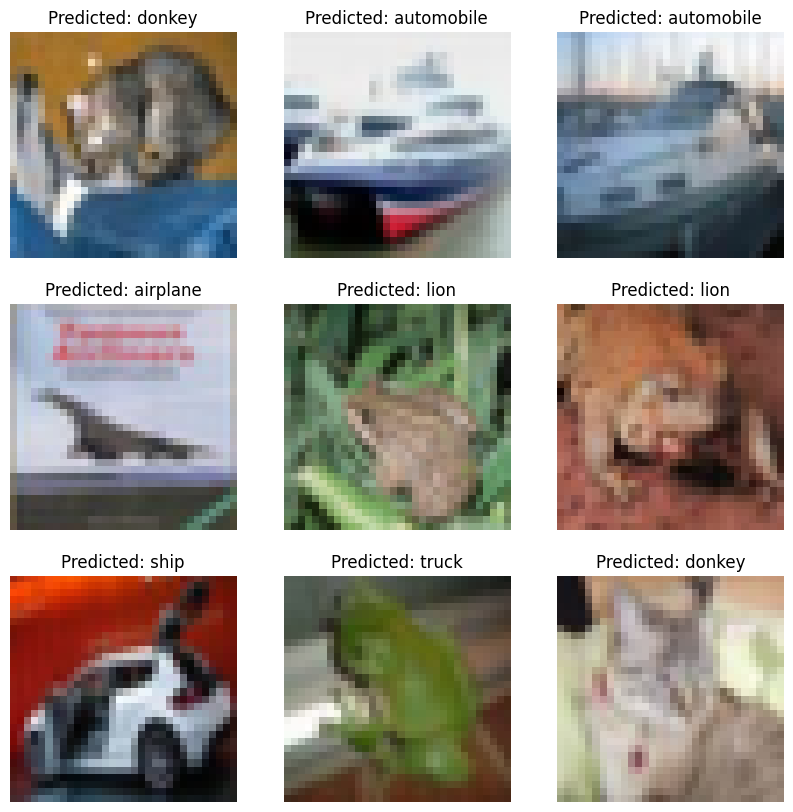

In [15]:
# Predict on test data
predictions = model.predict(x_test)

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display some predictions
class_names = ['airplane','ship', 'truck','donkey', 'man','cycle','lion','mosque','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.show()

Save the Model
Save the trained model for future use.

In [16]:
model.save("cifar10_cnn_model.h5")